## **Library and Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, f1_score

# models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KaggleDatasets/survey.csv')
print(df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/KaggleDatasets/survey.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

## **Data Cleaning**

 Mendeteksi dan menampilkan informasi tentang data yang hilang

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

### **PREPROCESSING**

Menghapus kolom comments, state dan timestamp

In [ ]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Cleaning NaN

Membersihkan data dan mengisi nilai yang hilang menggunakan nilai default yang telah ditentukan sesuai tipe data pada setiap kolomnya

In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
# Count the occurrences of each category in the 'work_interfere' column
work_interfere_counts = train_df['work_interfere'].value_counts()

# Print the counts and labels
work_interfere_counts

,count
work_interfere,
Sometimes,465
NaN,264
Never,213
Rarely,173
Often,144


Mengetahui variasi nilai apa saja yang ada pada kolom gender

In [ ]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


Menyederhanakan data gender dengan mengelompokkan nilainya ke dalam tiga kategori yaitu male, female dan trans dan menghapus data yang tidak valid

In [ ]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():
         if str.lower(col.Gender) in male_str:
             train_df.loc[row, 'Gender'] = 'male'
         if str.lower(col.Gender) in female_str:
             train_df.loc[row, 'Gender'] = 'female'
         if str.lower(col.Gender) in trans_str:
             train_df.loc[row, 'Gender'] = 'trans'

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


Membersihkan data age dengan mengisi nilai yang hilang, menangani outlier dan mengelompokkan age nya ke dalam rentang rentang tertentu

In [ ]:
# Mengisi nilai NaN pada kolom 'Age' dengan median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Mengisi nilai < 18 dengan median
train_df.loc[train_df['Age'] < 18, 'Age'] = train_df['Age'].median()

# Mengisi nilai > 120 dengan median
train_df.loc[train_df['Age'] > 120, 'Age'] = train_df['Age'].median()

# Membuat rentang umur
train_df['age_range'] = pd.cut(
    train_df['Age'],
    bins=[0, 20, 30, 65, 100],
    labels=["0-20", "21-30", "31-65", "66-100"],
    include_lowest=True
)

<ipython-input-58-a1b53a357f8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
<ipython-input-58-a1b53a357f8e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['age_range'] = pd.cut(


Hanya ada 0,014% self_emplyoed jadi kita bisa menggantinya menjadi NO

In [ ]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


<ipython-input-59-4816e127075b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')


Karena hanya ada 0,20% data yang memiliki nilai work_interfere jadi kita bisa menggunakan modus mencari nilai yang sering muncul

In [ ]:
# #There are only 0.20% of self work_interfere so let's change NaN to "Don't know
# #Replace "NaN" string from defaultString

# train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
# print(train_df['work_interfere'].unique())

In [ ]:
# Get the initial counts of each category
initial_counts = train_df['work_interfere'].value_counts()

# Replace 'NaN' values in 'work_interfere' with 'Sometimes'
train_df['work_interfere'] = train_df['work_interfere'].replace('NaN', 'Sometimes')

# Get the updated counts of each category
updated_counts = train_df['work_interfere'].value_counts()

# Calculate the difference in 'Sometimes' count
sometimes_diff = updated_counts['Sometimes'] - initial_counts.get('Sometimes', 0)

# Adjust the counts for 'Never', 'Rarely', and 'Often'
for category in ['Never', 'Rarely', 'Often']:
    updated_counts[category] = initial_counts.get(category, 0)

# Update the 'Sometimes' count with the difference
updated_counts['Sometimes'] = initial_counts.get('Sometimes', 0) + sometimes_diff

# Display the adjusted counts
print(updated_counts)

work_interfere
Sometimes    729
Never        213
Rarely       173
Often        142
Name: count, dtype: int64


<ipython-input-61-8d6776e68e69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['work_interfere'] = train_df['work_interfere'].replace('NaN', 'Sometimes')


### Encoding Data

Mengubah data kategorikal menjadi numerik

In [ ]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5',

In [ ]:
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


### Menguji tidak ada data yang hilang

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

## **CLOSE PREPROCESSING**

### **Covariance Matrix. Variability comparison between categories of variables**

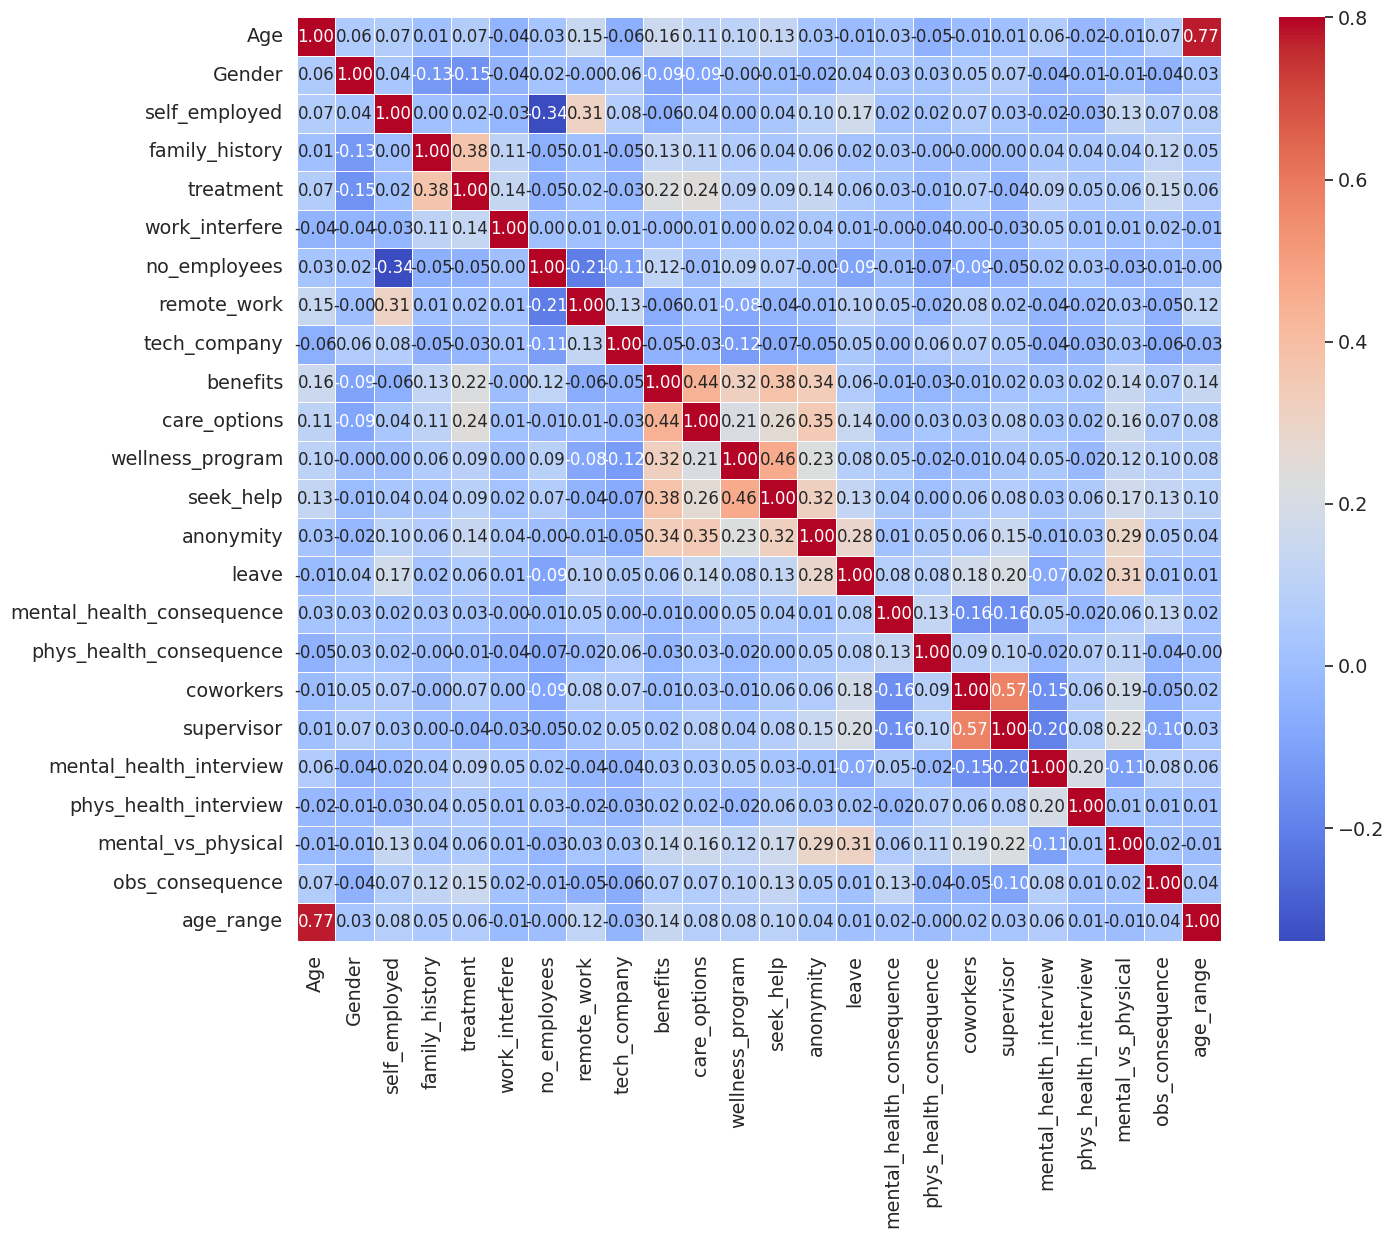

In [ ]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.show()

Visualisasi matriks korelasi heatmap untuk menunjukkan hubungan antara variabel treatment dengan 10 variabel lainnya yang memiliki korelasi tertinggi

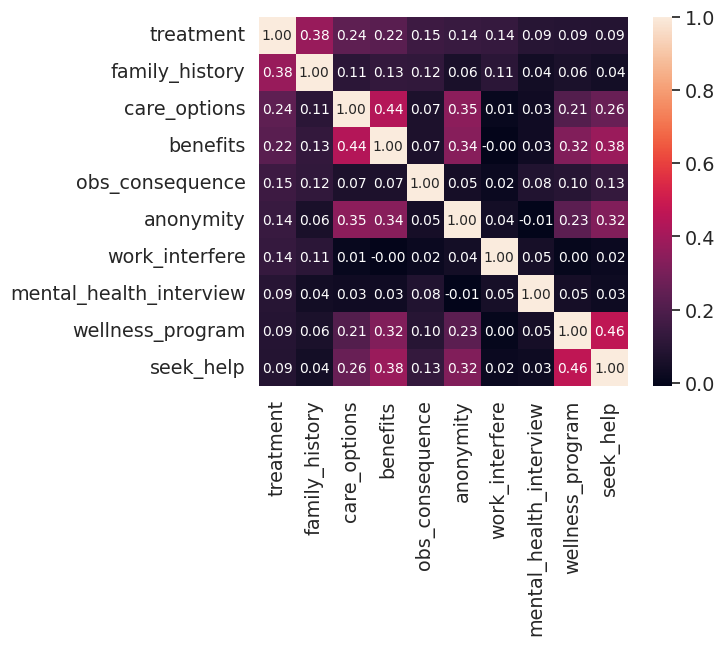

In [ ]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Beberapa grafik untuk melihat hubungan data

Distribution and density by Age



Text(0.5, 0, 'Age')

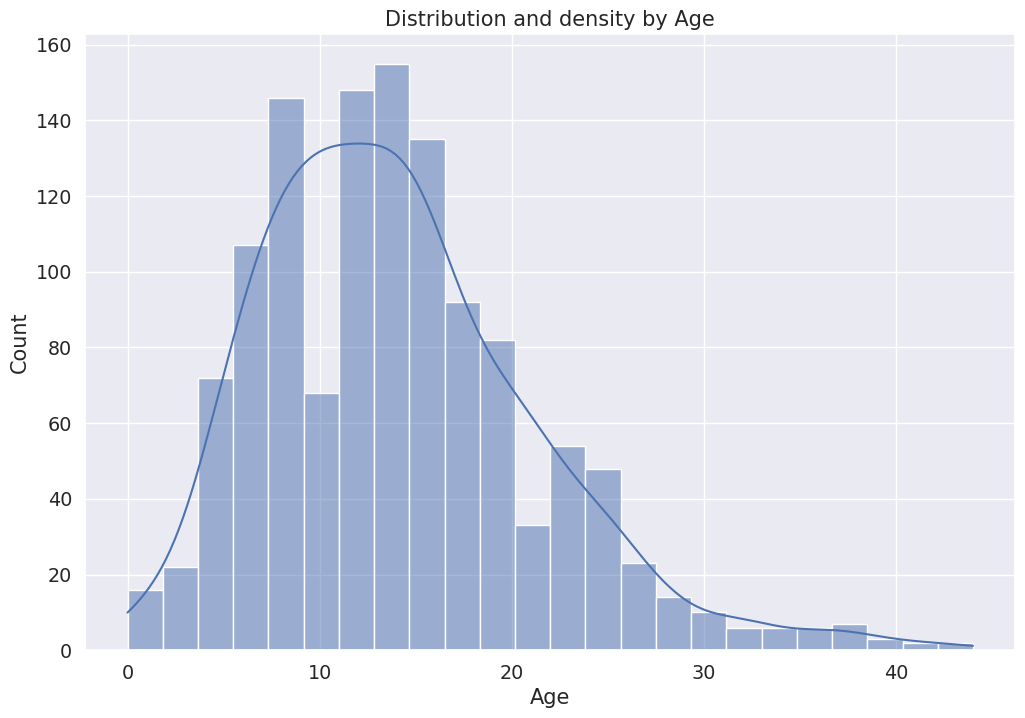

In [ ]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.histplot(train_df["Age"], bins=24, kde=True) # kde=True untuk menampilkan kurva density
plt.title("Distribution and density by Age")
plt.xlabel("Age")

Separate by treatment

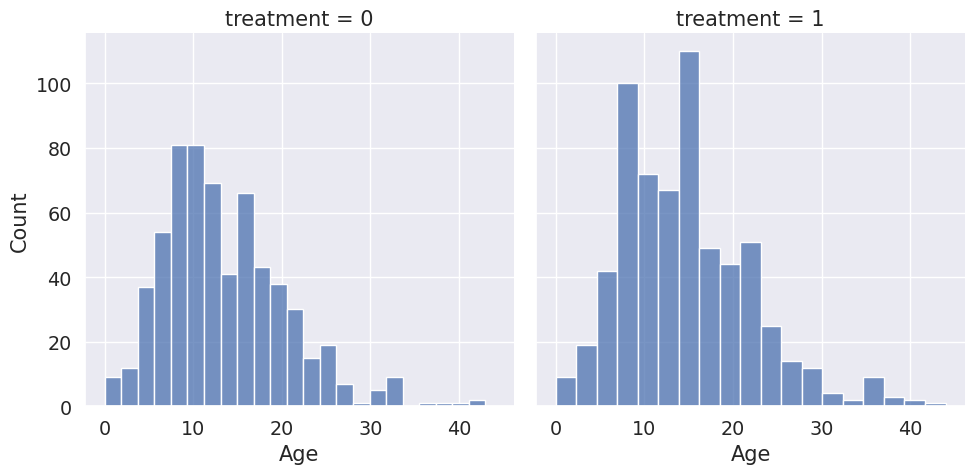

In [ ]:
g = sns.FacetGrid(train_df, col='treatment', height=5)
g.map(sns.histplot, "Age")
plt.show()

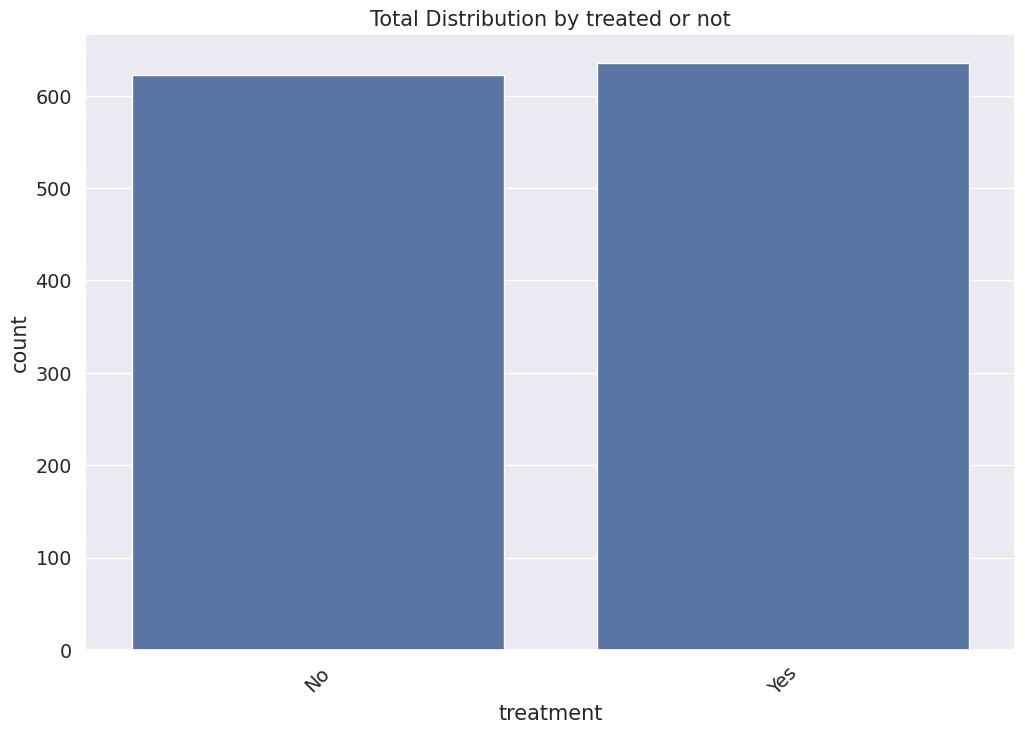

In [ ]:
plt.figure(figsize=(12,8))

# Mendapatkan label treatment dari labelDict
labels = labelDict['label_treatment'] # Changed from 'label_Gender' to 'label_treatment'

# Membuat countplot
g = sns.countplot(x="treatment", data=train_df)

# Menyesuaikan jumlah ticks dengan jumlah label
g.set_xticks(range(len(labels)))  # Menggunakan len(labels) untuk mendapatkan jumlah ticks yang sesuai
g.set_xticklabels(labels, rotation=45)   # Menetapkan label dengan rotasi 45 derajat (opsional)

# Menambahkan judul
plt.title('Total Distribution by treated or not')
plt.show()

In [ ]:
# Mendapatkan label treatment dari labelDict
labels = labelDict['label_treatment']

# Menghitung jumlah setiap kategori treatment
treatment_counts = train_df['treatment'].value_counts()

# Menampilkan angka dari total distribution by treated or not
print(f"Distribution of 'treatment':\n{treatment_counts}")

# Atau, jika ingin menampilkan dalam format yang lebih terstruktur:
for i, count in treatment_counts.items():
  print(f"Treatment: {labels[i]} - Count: {count}")

Distribution of 'treatment':
treatment
1    635
0    622
Name: count, dtype: int64
Treatment: Yes - Count: 635
Treatment: No - Count: 622


Nested barplot to show probabilities for class and sex

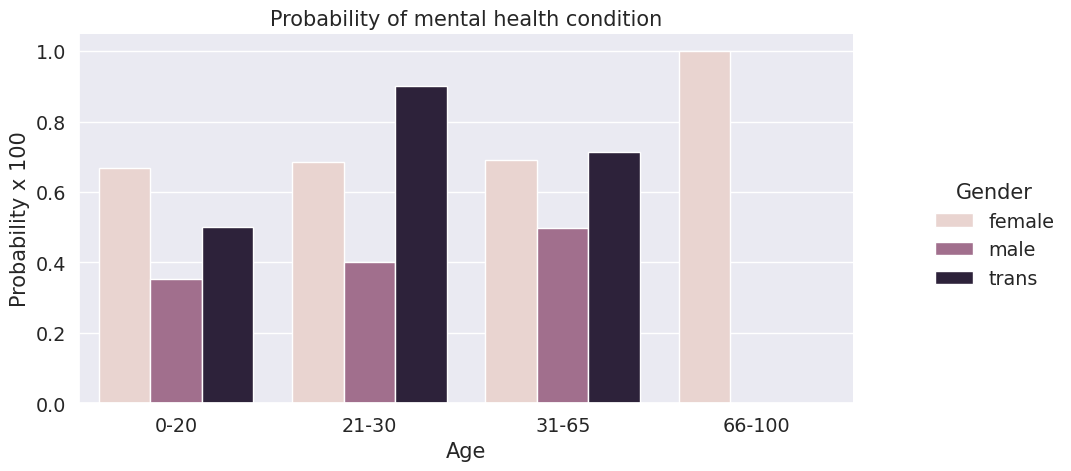

In [ ]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out = True) # Changed ci to errorbar
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for family history

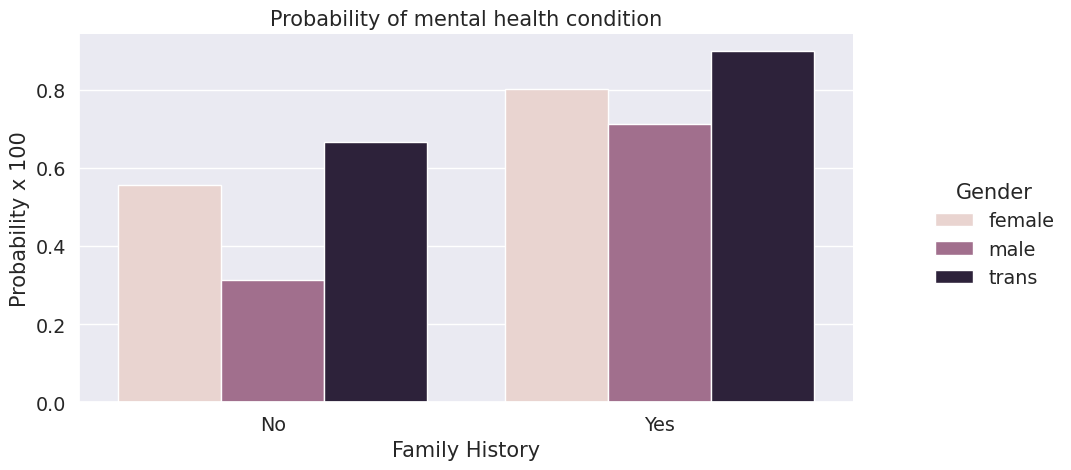

In [ ]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out = True) # Changed ci to errorbar
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for care options

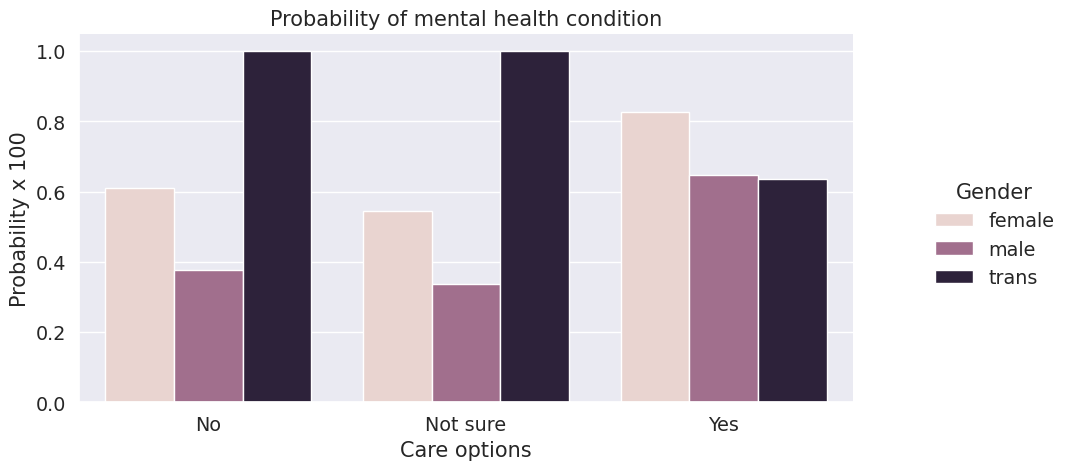

In [ ]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out = True) # Changed factorplot to catplot and ci to errorbar
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for benefits

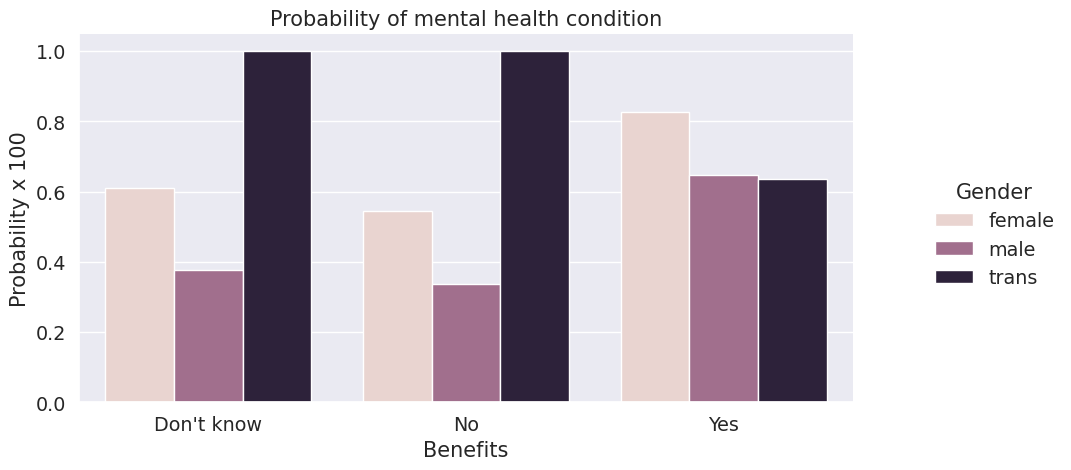

In [ ]:
o = labelDict['label_benefits']
# Use catplot instead of factorplot
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for work interfere

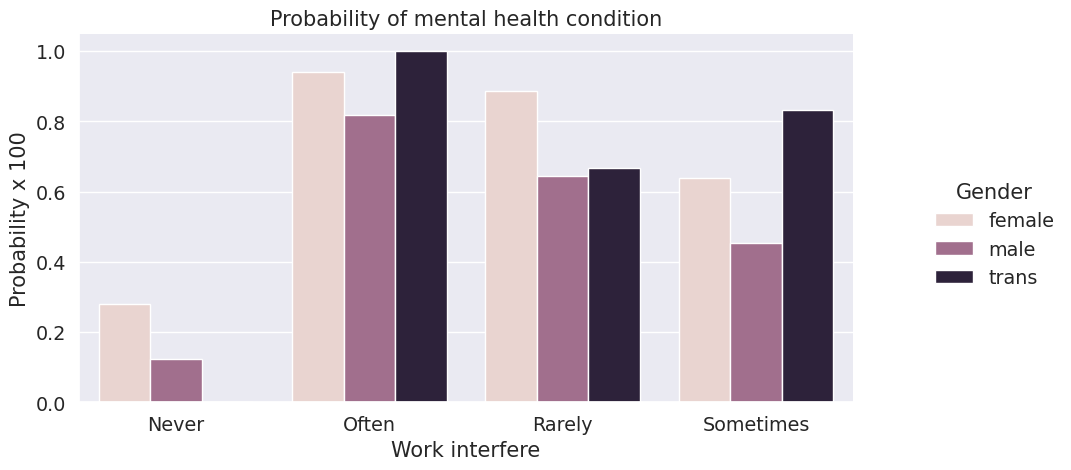

In [ ]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out = True) # Changed factorplot to catplot, size to height and ci to errorbar
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

### **Scaling and Fitting**

 Fitur Kami akan menskalakan usia, karena sangat berbeda dari yang lain.

## **NORMALISASI**

In [ ]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [ ]:
jumlah_baris = train_df.shape[0]
print(f"Jumlah keseluruhan baris: {jumlah_baris}")

Jumlah keseluruhan baris: 1257


Spilitting Dataset

In [ ]:
# PEMBAGIAN DATA X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split DATA X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()
# Menampilkan jumlah data training dan testing
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 1005
Jumlah data testing: 252


## **RANDOM FOREST**

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # Recall: When the actual value is positive, how often is the prediction correct?
    print('Recall:', metrics.recall_score(y_test, y_pred_class))

    # F1-score: The weighted average of precision and recall.
    print('F1-score:', f1_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

     # Classification report
    print(classification_report(y_test, y_pred_class))

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')


    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, threshold=0.3)[0]

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################

    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)



    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    #define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

### **Evaluasi Model**

In [ ]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1, bootstrap=True)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)

    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100

Rand. Best Score:  0.742247619047619
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 3}
[0.742, 0.753, 0.746, 0.744, 0.751, 0.742, 0.742, 0.744, 0.742, 0.745, 0.754, 0.745, 0.744, 0.744, 0.745, 0.743, 0.745, 0.749, 0.746, 0.743]
Accuracy: 0.7698412698412699
Null accuracy:
 treatment
0    129
1    123
Name: count, dtype: int64
Percentage of ones: 0.4880952380952381
Percentage of zeros: 0.5119047619047619
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0]


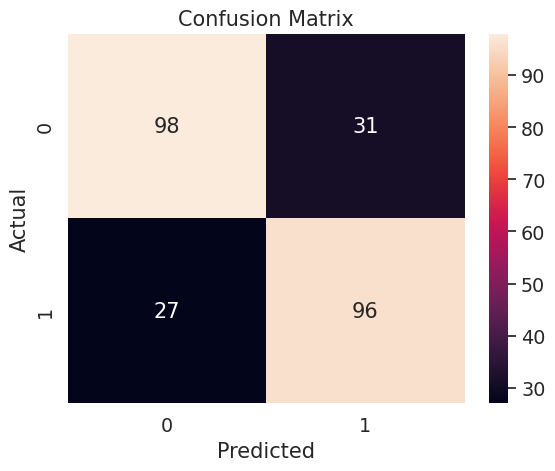

Classification Accuracy: 0.7698412698412699
Classification Error: 0.23015873015873012
False Positive Rate: 0.24031007751937986
Precision: 0.7559055118110236
AUC Score: 0.7700888636793345
Recall: 0.7804878048780488
F1-score: 0.768
Cross-validated AUC: 0.8050830903971505
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       129
           1       0.76      0.78      0.77       123

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252

First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.34128525 0.65871475]
 [0.80583294 0.19416706]
 [0.74866065 0.25133935]
 [0.78439025 0.21560975]
 [0.69680644 0.30319356]
 [0.31614564 0.68385436]
 [0.74783837 0.25216163]
 [0.63039361 0.36960639]
 [0.22745913 0.77254087]
 [0.23357844 0.76642156]]
First 10 predicted probabilities:
 [[0.65871475

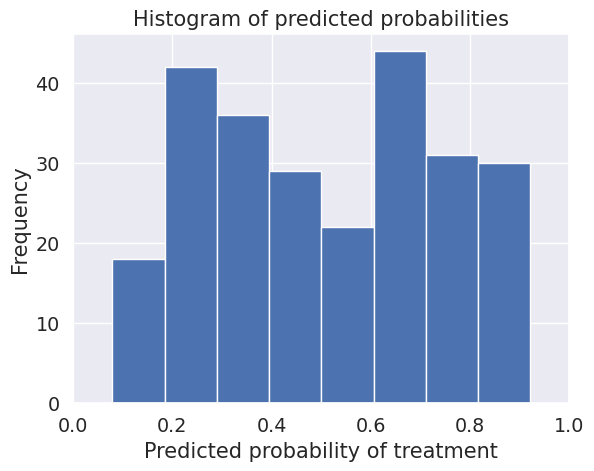

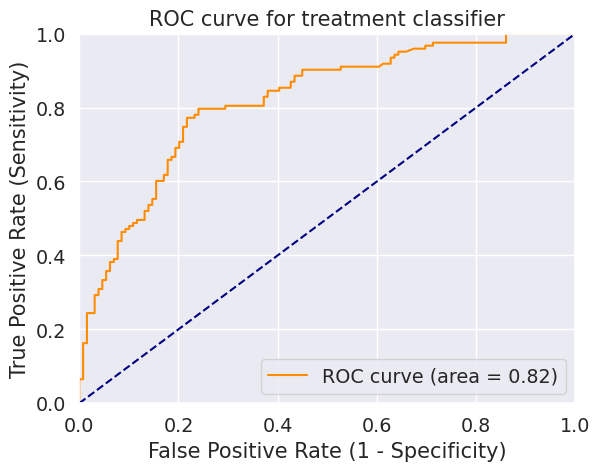

[[98 31]
 [27 96]]


In [ ]:
randomForest()

K-Fold cross validation

Percobaan 1: Akurasi = 0.74
Percobaan 2: Akurasi = 0.70
Percobaan 3: Akurasi = 0.73
Percobaan 4: Akurasi = 0.73
Percobaan 5: Akurasi = 0.64
Percobaan 6: Akurasi = 0.60
Percobaan 7: Akurasi = 0.72
Percobaan 8: Akurasi = 0.71
Percobaan 9: Akurasi = 0.74
Percobaan 10: Akurasi = 0.73
Percobaan 11: Akurasi = 0.72
Percobaan 12: Akurasi = 0.82
Percobaan 13: Akurasi = 0.76
Percobaan 14: Akurasi = 0.92

Confusion Matrix pada Fold ke-14:
[[40  3]
 [ 4 42]]


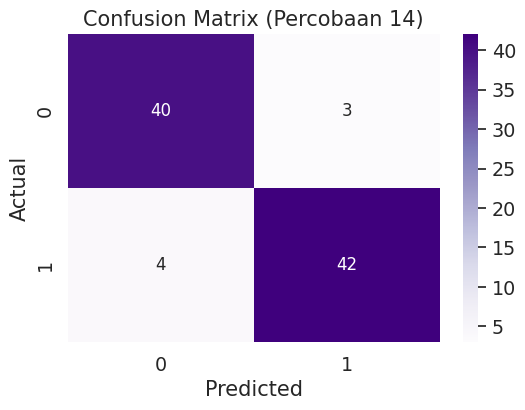

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.93      0.91      0.92        46

    accuracy                           0.92        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89



In [ ]:
# 5. Konfigurasi K-Fold Cross Validation
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function here.
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
k = 14  # Jumlah fold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Fit the encoder to your target variable (y) to get the class names
label_encoder.fit(y)

# Reset index of y to ensure it aligns with X
y = y.reset_index(drop=True)

# Initialize the model - Here we use RandomForestClassifier as an example
model = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=20, random_state=1)

# 6. Proses K-Fold Cross Validation & Simpan Hasil Fold ke-7
fold = 1
best_fold = 14  # Menampilkan Confusion Matrix untuk Fold ke-7

accuracies = [] # Initialize accuracies list here

for train_index, test_index in kf.split(X):
    # Split data menjadi training dan testing set
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Use iloc to access by position

    # Latih model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi akurasi untuk setiap fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Percobaan {fold}: Akurasi = {accuracy:.2f}")

    accuracies.append(accuracy) # Store the accuracy here

    # Simpan dan tampilkan Confusion Matrix untuk fold ke-3
    if fold == best_fold:
        print(f"\nConfusion Matrix pada Fold ke-{best_fold}:")
        cm = confusion_matrix(y_test, y_pred)  # Now, confusion_matrix is recognized.
        print(cm)

        # Visualisasi Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                    xticklabels=label_encoder.classes_,  # Now label_encoder is defined
                    yticklabels=label_encoder.classes_)  # Now label_encoder is defined
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix (Percobaan {best_fold})")
        plt.show()

        # Tampilkan laporan klasifikasi
        # Convert label_encoder.classes_ to a list of strings
        target_names = [str(cls) for cls in label_encoder.classes_]
        print(classification_report(y_test, y_pred, target_names=target_names))

    fold += 1

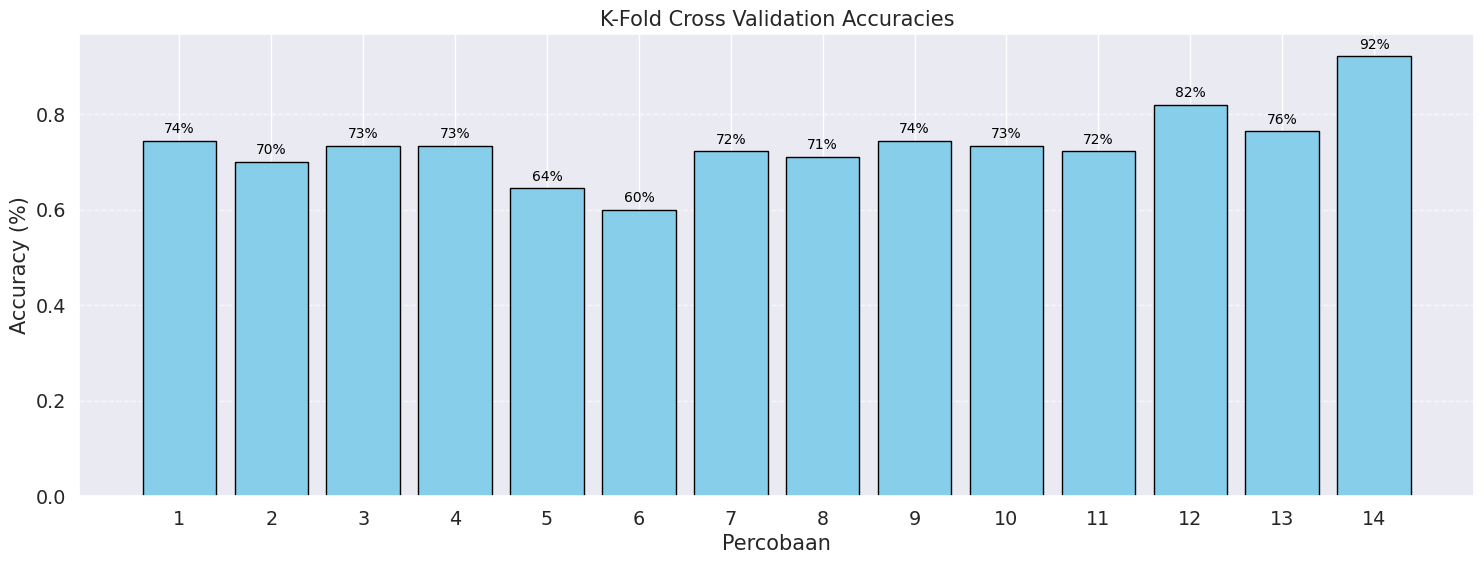

In [ ]:
# Visualize accuracies as bar chart with annotations
plt.figure(figsize=(18, 6))
bars = plt.bar(range(1, k + 1), accuracies, color='skyblue', edgecolor='black')

# Add accuracy values as annotations on top of bars
for i, bar in enumerate(bars):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        bar.get_height() + 0.01,           # Y position (slightly above the bar)
        f"{round(accuracies[i] * 100)}%",  # Text (rounded percentage format)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10,                       # Font size
        color='black'                      # Text color
    )

# Labeling and formatting
plt.xlabel("Percobaan")
plt.ylabel("Accuracy (%)")
plt.title("K-Fold Cross Validation Accuracies")
plt.xticks(range(1, k + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Assume X and y are defined from your previous code

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    "max_depth": [3, 5, None],
    "n_estimators": [10, 20, 50],
    "min_samples_leaf": [1, 2, 3, 8],
    "min_samples_split": [2, 4, 6]
}

# Define k for KFold
k = 14
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define the accuracies from the previous K-Fold Cross Validation
accuracies = [0.74, 0.70, 0.73, 0.73, 0.64, 0.60, 0.72, 0.71, 0.74, 0.73, 0.72, 0.82, 0.76, 0.92]

# Initialize an empty list to store the tuning results
tuning_results = []

# K-Fold cross validation with parameter tuning
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Randomized search for parameter tuning
    rand_search = RandomizedSearchCV(
        RandomForestClassifier(random_state=1),
        param_dist,
        cv=3,
        scoring="accuracy",
        n_iter=10,
        random_state=42
    )
    rand_search.fit(X_train, y_train)

    # Get the best parameters and accuracy from the randomized search
    best_params = rand_search.best_params_
    best_accuracy = rand_search.best_score_

    # Save the fold number, best parameters, and corresponding accuracy from the accuracies list
    tuning_results.append({
        "Fold": fold,
        "max_depth": best_params.get('max_depth'),
        "n_estimators": best_params.get('n_estimators'),
        "min_samples_leaf": best_params.get('min_samples_leaf'),
        "min_samples_split": best_params.get('min_samples_split'),
        "Accuracy": accuracies[fold-1]
    })
    fold += 1

# Create a DataFrame from the tuning results and display it
tuning_df = pd.DataFrame(tuning_results)
print(tuning_df)

    Fold  max_depth  n_estimators  min_samples_leaf  min_samples_split  \
0      1          5            50                 3                  6   
1      2          5            50                 3                  6   
2      3          5            50                 3                  6   
3      4          5            50                 3                  6   
4      5          5            50                 3                  6   
5      6          5            50                 3                  6   
6      7          5            50                 3                  6   
7      8          5            50                 3                  6   
8      9          5            20                 8                  4   
9     10          3            50                 2                  2   
10    11          5            50                 3                  6   
11    12          5            50                 3                  6   
12    13          5            10     